In [1]:
import pandas as pd

peliculas = pd.read_csv("movies.csv")
peliculas.columns = ["peliculaId", "titulo", "generos"]  # renombramos coloumnas
peliculas = peliculas.set_index("peliculaId") # eliminamos indice del dataset
peliculas.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"] # renombramos columnas
notas = notas.set_index("usuarioId") # eliminamos indice del dataset
notas.head()

,peliculaId,nota,momento
usuarioId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


In [3]:
notas.describe()

,peliculaId,nota,momento
count,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,3.501557,1.205946e+09
std,35530.987199,1.042529,2.162610e+08
min,1.000000,0.500000,8.281246e+08
25%,1199.000000,3.000000,1.019124e+09
50%,2991.000000,3.500000,1.186087e+09
75%,8122.000000,4.000000,1.435994e+09
max,193609.000000,5.000000,1.537799e+09


# Primera tentativa de recomendación: heurística de total de votos

In [4]:
total_de_votos = notas["peliculaId"].value_counts()
total_de_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: peliculaId, dtype: int64

# ¿ Cómo saber títiulo de la película que tiene el código 318 ?

In [5]:
peliculas.loc[318]

titulo     Shawshank Redemption, The (1994)
generos                         Crime|Drama
Name: 318, dtype: object

# Podemos buscar en internet más información sobre esa película en especial ....
google ... imdb Shawshank Redemption

In [6]:
peliculas['total_de_votos'] = total_de_votos     # insertamos una nueva columna
peliculas.head()

,titulo,generos,total_de_votos
peliculaId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [7]:
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [8]:
notas_medias = notas.groupby("peliculaId").mean()["nota"]
notas_medias.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [9]:
peliculas["nota_media"] = notas_medias
peliculas.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Segunda heurística: nota media y filtrando los votos

In [10]:
peliculas.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [11]:
peliculas.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [12]:
peliculas_con_mas_de_50_votos = peliculas.query("total_de_votos >= 50")
peliculas_con_mas_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [13]:
yo_vi = [1, 21, 19, 10, 11, 7, 2]
peliculas.loc[yo_vi]

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [14]:
aventura_infantil_y_fantasia = peliculas_con_mas_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_y_fantasia.drop(yo_vi, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Collaborative filtering x Content based filtering

# Buscando usuarios "similares"



In [15]:
from google.colab import files
from IPython.display import Image


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cargar1 = files.upload()
Image("UsuariosPeliculas.png",width=500)


In [ ]:
cargar2 = files.upload()
Image("distanciaEuclidiana.png",width=400)

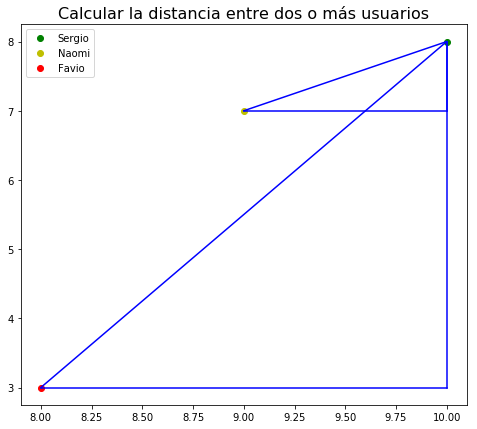

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.plot(10, 8, "go")
plt.plot(9, 7, "yo")
plt.plot(8, 3, "ro")
plt.legend(["Sergio", "Naomi","Favio"])
plt.title("Calcular la distancia entre dos o más usuarios", fontsize='16')

plt.plot([9, 10], [7, 8], color="b", linestyle="-")
plt.plot([9, 10], [7, 7], color="b", linestyle="-")
plt.plot([10, 10], [7, 8], color="b", linestyle="-")

plt.plot([8, 10], [3, 8], color="b", linestyle="-")
plt.plot([8, 10], [3, 3], color="b", linestyle="-")
plt.plot([10, 10],[3, 8], color="b", linestyle="-")


In [18]:
import numpy as np

sergio = np.array([10, 8])
naomi = np.array([9, 7])
favio = np.array([8, 3])

sergio - naomi, sergio - favio


(array([1, 1]), array([2, 5]))

In [20]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(sergio, naomi)

1.4142135623730951

In [21]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(sergio, naomi)

1.4142135623730951

In [22]:
def distancia(a,b):
  return np.linalg.norm(a - b)

In [23]:
print('distancia entre Sergio y Naomi= ', distancia(sergio,naomi))
print('distancia entre Sergio y Favio= ', distancia(sergio,favio))

distancia entre Sergio y Naomi=  1.4142135623730951
distancia entre Sergio y Favio=  5.385164807134504


# Redefiniendo la función distancia como distancia_de_vectores

In [24]:
def distancia_de_vectores(a,b):
  return np.linalg.norm(a - b)

In [25]:
notas_usuario = notas.query("usuarioId==2")
notas_usuario.head()

,peliculaId,nota,momento
usuarioId,,,
2,318,3.0,1445714835
2,333,4.0,1445715029
2,1704,4.5,1445715228
2,3578,4.0,1445714885
2,6874,4.0,1445714952


In [26]:
def notas_usuario(usuario):
  notas_usuario = notas.query("usuarioId==%d" % usuario)
  notas_usuario = notas_usuario[["peliculaId", "nota"]].set_index("peliculaId")
  return notas_usuario

In [27]:
usuario1 = notas_usuario(1)
usuario2 = notas_usuario(2)

In [28]:
usuario1.head()

,nota
peliculaId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [29]:
usuario2.head()

,nota
peliculaId,
318,3.0
333,4.0
1704,4.5
3578,4.0
6874,4.0


# Fusionando el dataframe del usuario 1 con el del usuario 2, para conocer las películas comunes a ambos usuarios

In [30]:
diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB")
diferencias.head(20)

,nota_usuarioA,nota_usuarioB
peliculaId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,NaN
70,3.0,NaN
101,5.0,NaN
110,4.0,NaN
151,5.0,NaN


Eliminando las películas que no son comunes a ambos usuarios tenemos ...

In [31]:
diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
diferencias.head(10)

,nota_usuarioA,nota_usuarioB
peliculaId,,
333,5.0,4.0
3578,5.0,4.0


In [32]:

diferencias = usuario1.join(usuario2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])

1.4142135623730951

# Optimizando el código de la función para calcular la distancia entre 2 usuarios, utilizando la variable...<< usuarioId >>, tenemos ... 

In [33]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  return distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])

In [34]:
distancia_de_usuarios(1,2)

1.4142135623730951

Vamos a mejorar el código de la función <<< distancia_de_usuarios >>>, retornando los usuarios y la distancia entre ellos ... 

In [35]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_usuario(usuario_id1)
  notas2 = notas_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix="_usuarioA", rsuffix="_usuarioB").dropna()
  distancia =  distancia_de_vectores(diferencias['nota_usuarioA'], diferencias['nota_usuarioB'])
  return [usuario_id1, usuario_id2, distancia]

In [36]:
distancia_de_usuarios(1,2)

[1, 2, 1.4142135623730951]

Determinando la cantidad de usuarios de nuestro sistema ...

# ¿ Cuáles son los usuarios que existen en nuestro dataset ?

In [37]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"]  # renombramos columnas
notas['usuarioId']

0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
         ... 
100806    610
100807    610
100808    610
100809    610
100810    610
100811    610
100812    610
100813    610
100814    610
100815    610
100816    610
100817    610
100818    610
100819    610
100820    610
100821    610
100822    610
100823    610
100824    610
100825    610
100826    610
100827    610
100828    610
100829    610
100830    610
100831    610
100832    610
100833    610
100834    610
100835    610
Name: usuarioId, Length: 100836, dtype: int64

In [38]:
notas['usuarioId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Pero ... ¿ cuántos usuarios tenemos ?

In [39]:
cantidad_de_usuarios = len(notas['usuarioId'].unique())
print("Tenemos %d usuarios" % cantidad_de_usuarios)


Tenemos 610 usuarios


## Luego, si tenemos al usuario 1, tenemos que comparar las distancias de los 609 usuarios restantes respecto del usuario 1 ... Y así vamos haciendo con cada uno de los usuarios del sistema.

In [40]:
def distancia_de_todos(tu_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informaciones = distancia_de_usuarios(tu_id, usuario_id)
    distancias.append(informaciones)
  return distancias

distancia_de_todos(1)[:15]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413],
 [1, 6, 8.602325267042627],
 [1, 7, 7.106335201775948],
 [1, 8, 3.7416573867739413],
 [1, 9, 1.0],
 [1, 10, 7.858116822750856],
 [1, 11, 4.242640687119285],
 [1, 12, 0.7071067811865476],
 [1, 13, 1.4142135623730951],
 [1, 14, 5.0],
 [1, 15, 5.852349955359813]]

Pasando las distancias de una LISTA a un DATAFRAME tenemos ...

In [41]:
def distancia_de_todos(tu_id):
  todos_los_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(tu_id, usuario_id) for usuario_id in todos_los_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["tu", "otro_usuario", "distancia"])
  return distancias

distancia_de_todos(1).head(10)

,tu,otro_usuario,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


## Ordenando usuarios por DISTANCIA y lidiando con casos extremos ....

# ¿ Qué explicación podemos dar al siguiente cuadro ?

In [42]:
distancia_de_todos(1).query("distancia==0.00").set_index('tu')

,otro_usuario,distancia
tu,,
1,1,0.0
1,77,0.0
1,85,0.0
1,175,0.0
1,253,0.0
1,291,0.0
1,306,0.0
1,397,0.0
1,496,0.0


# Usuarios sin películas vistas en común, son colocados bien distantes uno del otro